In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import torch
from time import time
from env import Env_tsp
from config import Config, load_pkl, pkl_parser
from search import sampling, active_search
import os


def search_tour(cfg, env, m_input=None, num=None, fromCity=None):
    test_input = env.get_nodes(cfg.seed, m_input)

    # random
    print('generate random tour...')
    random_tour = env.get_random_tour(fromCity)
    env.show(test_input, random_tour)

    # simplest way
    print('sampling ...')
    t1 = time()
    pred_tour = sampling(cfg, env, test_input)
    t2 = time()
    print('%dmin %1.2fsec\n' % ((t2 - t1) // 60, (t2 - t1) % 60))
    env.show(test_input, pred_tour)

    # active search, update parameters during test
    print('active search ...')
    t1 = time()
    pred_tour = active_search(cfg, env, test_input, fromCity=fromCity)
    t2 = time()
    print('%dmin %1.2fsec\n' % ((t2 - t1) // 60, (t2 - t1) % 60))
    env.show(test_input, pred_tour, num)
    return pred_tour
    """
    # optimal solution, it takes time
    print('generate optimal solution ...')
    t1 = time()
    optimal_tour = env.get_optimal_tour(test_input)
    env.show(test_input, optimal_tour)
    t2 = time()
    print('%dmin %1.2fsec\n'%((t2-t1)//60, (t2-t1)%60))
    """


/content/drive/MyDrive/TSP
第一象限数据：
    idx    x    y  area    l      e
7     7  175  106    21  0.3  16900
8     8   44  185     2  0.4  19599
9     9  357  166    13  0.7  28899
10   10   49   63     2  0.6  25600
11   11  253  225    12  0.8  32400
12   12   74  278    10  0.6  25600

第二象限数据：
   idx    x    y  area    l      e
1    1  -17  271    12  0.3  16900
2    2 -353  114    19  0.3  16900
3    3  -18  178     7  0.6  25600
4    4 -244  193    17  0.4  19599
5    5  -53   28    23  0.6  25600
6    6 -137   93     9  0.5  22500

第三象限数据：
    idx    x    y  area    l      e
13   13 -191  -82     3  0.3  16900
14   14  -21 -353    13  0.7  28899
15   15 -284 -175    22  0.5  22500
16   16 -158 -246    19  0.7  28899
17   17  -41  -49    10  0.4  19599
18   18 -152  -36    10  0.6  25600

第四象限数据：
    idx    x    y  area    l      e
19   19   50 -305     8  0.7  28899
20   20   70 -303    11  0.5  22500
21   21  224 -124     8  0.4  19599
22   22  282 -298     2  0.3  16900
23   23  

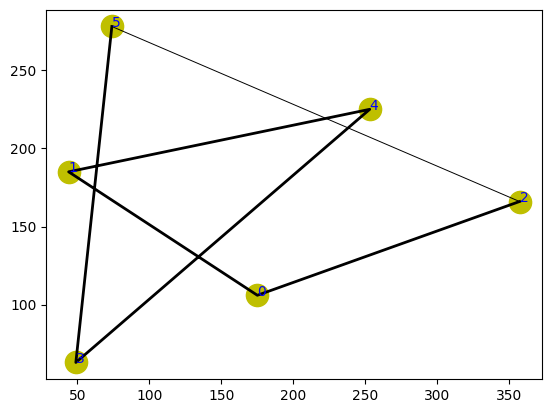

sampling ...
specify pretrained model path
0min 0.16sec

distance:850.843
tensor([0, 3, 1, 5, 4, 2])


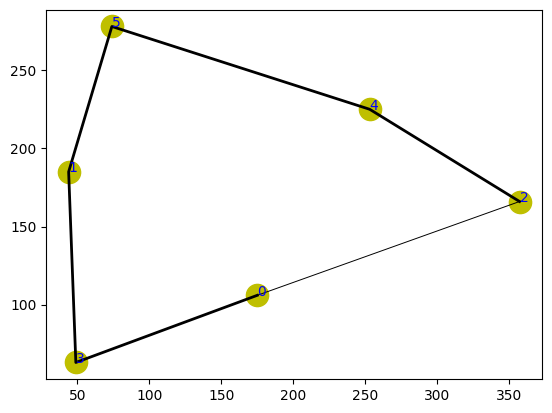

active search ...


  0%|          | 0/10 [00:00<?, ?it/s]

update best tour, min l(1254.270 -> 850.843)


 10%|█         | 1/10 [00:00<00:05,  1.68it/s]

step:0/10, actic loss:262.955


 20%|██        | 2/10 [00:01<00:04,  1.68it/s]

step:1/10, actic loss:268.103


 30%|███       | 3/10 [00:01<00:04,  1.67it/s]

step:2/10, actic loss:410.875


 40%|████      | 4/10 [00:02<00:03,  1.70it/s]

step:3/10, actic loss:384.146


 50%|█████     | 5/10 [00:02<00:02,  1.69it/s]

step:4/10, actic loss:407.815


 60%|██████    | 6/10 [00:03<00:02,  1.69it/s]

step:5/10, actic loss:381.999


 70%|███████   | 7/10 [00:04<00:01,  1.70it/s]

step:6/10, actic loss:321.270


 80%|████████  | 8/10 [00:04<00:01,  1.70it/s]

step:7/10, actic loss:333.675


 90%|█████████ | 9/10 [00:05<00:00,  1.71it/s]

step:8/10, actic loss:259.213


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

step:9/10, actic loss:231.441
0min 6.24sec

distance:850.843
tensor([4, 2, 0, 3, 1, 5])


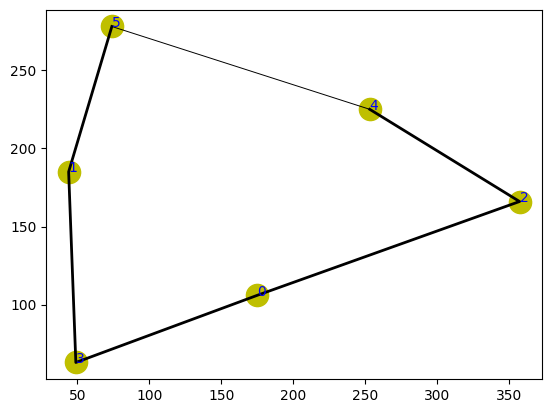

mode: test
batch: 512
city_t: 6
steps: 10
embed: 128
hidden: 128
clip_logits: 10
softmax_T: 1.0
optim: Adam
init_min: -0.08
init_max: 0.08
n_glimpse: 1
n_process: 3
decode_type: sampling
lr: 0.001
is_lr_decay: True
lr_decay: 0.96
lr_decay_step: 5000.0
act_model_path: /home/stu_wxy/content/TSP_DRL_PtrNet-master/Pt/train8_0906_16_32_step12999_act.pt
seed: 1
alpha: 0.99
islogger: False
issaver: True
log_step: 10
log_dir: ./Csv/
model_dir: ./Pt/
pkl_dir: ./Pkl/
cuda_dv: 0
dump_date: 0906_17_50
task: test6
pkl_path: ./Pkl/test6.pkl
n_samples: 5120

generate random tour...
distance:1238.841
tensor([5, 4, 1, 2, 0, 3])


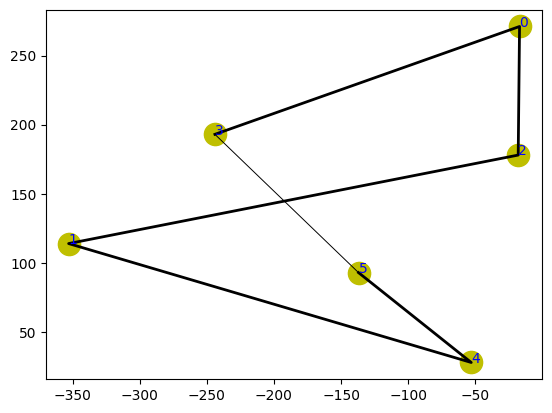

sampling ...
specify pretrained model path
0min 0.25sec

distance:944.910
tensor([0, 2, 4, 5, 1, 3])


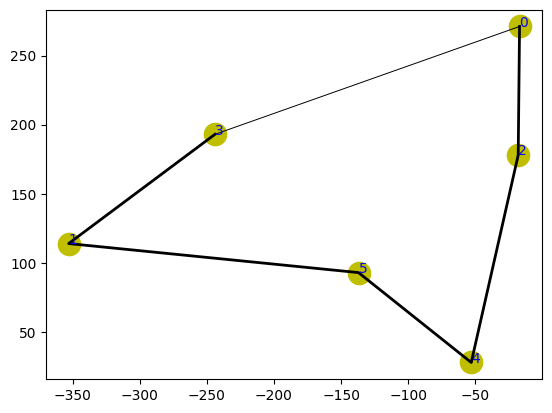

active search ...


  0%|          | 0/10 [00:00<?, ?it/s]

update best tour, min l(1213.807 -> 944.910)


 10%|█         | 1/10 [00:00<00:08,  1.09it/s]

step:0/10, actic loss:-119.566


 20%|██        | 2/10 [00:01<00:06,  1.17it/s]

step:1/10, actic loss:156.200


 30%|███       | 3/10 [00:02<00:05,  1.37it/s]

step:2/10, actic loss:411.574


 40%|████      | 4/10 [00:02<00:04,  1.47it/s]

step:3/10, actic loss:432.092


 50%|█████     | 5/10 [00:03<00:03,  1.54it/s]

step:4/10, actic loss:406.037


 60%|██████    | 6/10 [00:04<00:02,  1.57it/s]

step:5/10, actic loss:370.120


 70%|███████   | 7/10 [00:04<00:01,  1.60it/s]

step:6/10, actic loss:348.049


 80%|████████  | 8/10 [00:05<00:01,  1.64it/s]

step:7/10, actic loss:235.078


 90%|█████████ | 9/10 [00:05<00:00,  1.65it/s]

step:8/10, actic loss:245.984


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

step:9/10, actic loss:298.952
0min 6.58sec

distance:944.910
tensor([3, 1, 5, 4, 2, 0])


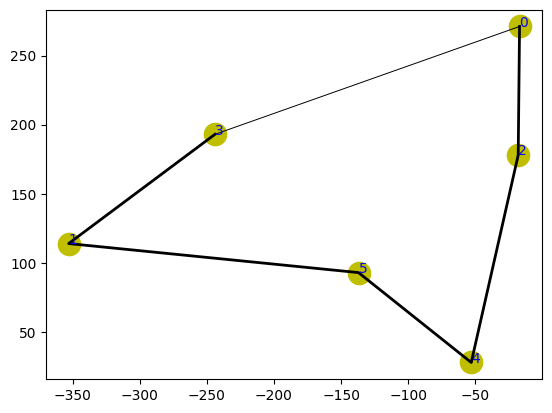

mode: test
batch: 512
city_t: 6
steps: 10
embed: 128
hidden: 128
clip_logits: 10
softmax_T: 1.0
optim: Adam
init_min: -0.08
init_max: 0.08
n_glimpse: 1
n_process: 3
decode_type: sampling
lr: 0.001
is_lr_decay: True
lr_decay: 0.96
lr_decay_step: 5000.0
act_model_path: /home/stu_wxy/content/TSP_DRL_PtrNet-master/Pt/train8_0906_16_32_step12999_act.pt
seed: 1
alpha: 0.99
islogger: False
issaver: True
log_step: 10
log_dir: ./Csv/
model_dir: ./Pt/
pkl_dir: ./Pkl/
cuda_dv: 0
dump_date: 0906_17_50
task: test6
pkl_path: ./Pkl/test6.pkl
n_samples: 5120

generate random tour...
distance:1337.342
tensor([2, 5, 4, 3, 0, 1])


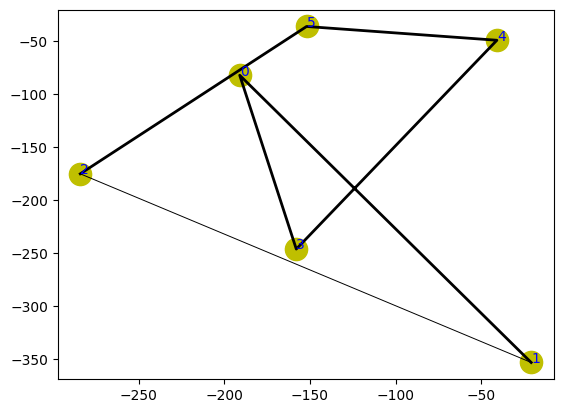

sampling ...
specify pretrained model path
0min 0.17sec

distance:926.706
tensor([3, 2, 0, 5, 4, 1])


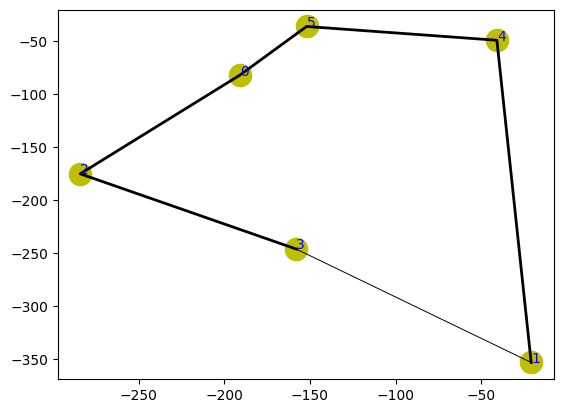

active search ...


  0%|          | 0/10 [00:00<?, ?it/s]

update best tour, min l(1080.748 -> 926.706)


 10%|█         | 1/10 [00:00<00:05,  1.67it/s]

step:0/10, actic loss:4.065
update best tour, min l(926.706 -> 926.706)


 20%|██        | 2/10 [00:01<00:05,  1.37it/s]

step:1/10, actic loss:231.853


 30%|███       | 3/10 [00:02<00:04,  1.47it/s]

step:2/10, actic loss:270.077


 40%|████      | 4/10 [00:02<00:03,  1.54it/s]

step:3/10, actic loss:279.092


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

step:4/10, actic loss:314.137


 60%|██████    | 6/10 [00:04<00:02,  1.46it/s]

step:5/10, actic loss:307.049


 70%|███████   | 7/10 [00:04<00:02,  1.30it/s]

step:6/10, actic loss:296.248


 80%|████████  | 8/10 [00:05<00:01,  1.23it/s]

step:7/10, actic loss:219.246


 90%|█████████ | 9/10 [00:06<00:00,  1.18it/s]

step:8/10, actic loss:142.407


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

step:9/10, actic loss:111.324
0min 7.80sec

distance:926.706
tensor([2, 0, 5, 4, 1, 3])


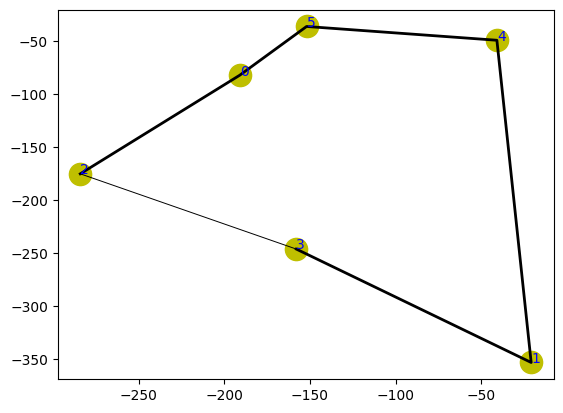

mode: test
batch: 512
city_t: 6
steps: 10
embed: 128
hidden: 128
clip_logits: 10
softmax_T: 1.0
optim: Adam
init_min: -0.08
init_max: 0.08
n_glimpse: 1
n_process: 3
decode_type: sampling
lr: 0.001
is_lr_decay: True
lr_decay: 0.96
lr_decay_step: 5000.0
act_model_path: /home/stu_wxy/content/TSP_DRL_PtrNet-master/Pt/train8_0906_16_32_step12999_act.pt
seed: 1
alpha: 0.99
islogger: False
issaver: True
log_step: 10
log_dir: ./Csv/
model_dir: ./Pt/
pkl_dir: ./Pkl/
cuda_dv: 0
dump_date: 0906_17_50
task: test6
pkl_path: ./Pkl/test6.pkl
n_samples: 5120

generate random tour...
distance:1249.521
tensor([0, 3, 2, 4, 1, 5])


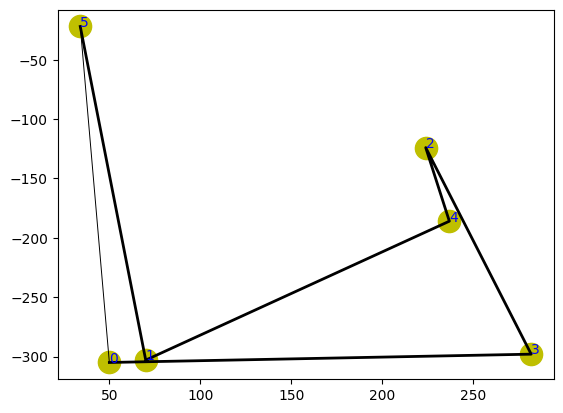

sampling ...
specify pretrained model path
0min 0.17sec

distance:915.309
tensor([3, 1, 0, 5, 2, 4])


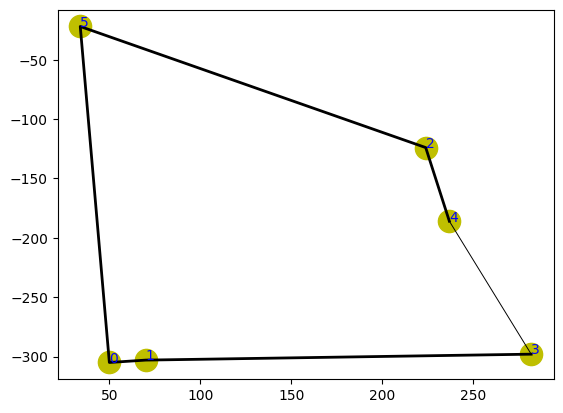

active search ...


  0%|          | 0/10 [00:00<?, ?it/s]

update best tour, min l(1116.141 -> 915.309)


 10%|█         | 1/10 [00:00<00:05,  1.72it/s]

step:0/10, actic loss:-88.253


 20%|██        | 2/10 [00:01<00:04,  1.70it/s]

step:1/10, actic loss:224.297


 30%|███       | 3/10 [00:01<00:04,  1.67it/s]

step:2/10, actic loss:447.016


 40%|████      | 4/10 [00:02<00:03,  1.68it/s]

step:3/10, actic loss:432.561


 50%|█████     | 5/10 [00:02<00:02,  1.68it/s]

step:4/10, actic loss:446.414


 60%|██████    | 6/10 [00:03<00:02,  1.69it/s]

step:5/10, actic loss:447.359


 70%|███████   | 7/10 [00:04<00:01,  1.68it/s]

step:6/10, actic loss:405.872


 80%|████████  | 8/10 [00:04<00:01,  1.68it/s]

step:7/10, actic loss:361.898


 90%|█████████ | 9/10 [00:05<00:00,  1.69it/s]

step:8/10, actic loss:336.935


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

step:9/10, actic loss:295.263
0min 6.01sec

distance:915.309
tensor([3, 1, 0, 5, 2, 4])


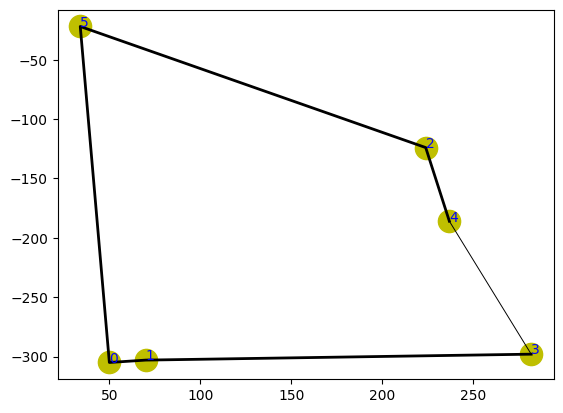

In [20]:
import copy
import os
import math
from env import get_2city_distance
import torch
from search import sampling, active_search
from config import Config, load_pkl, pkl_parser
from env import Env_tsp
from time import time
import pandas as pd
%cd / content/drive/MyDrive/TSP
# from test import search_tour
iniE = 100000
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  ###指定此处为-1即可
# datapath = '/home/stu_wxy/content/TSP_DRL_PtrNet-master/data.csv
datapath = '/content/drive/MyDrive/TSP/data.csv'
# 假设你的数据已经存储在一个名为 df 的 Pandas DataFrame 中
df = pd.read_csv(datapath)

# 根据列的位置来分配x和y坐标
idx_column = 0
x_column = 1  # 假设x坐标在第一列（从0开始计数）
y_column = 2  # 假设y坐标在第二列（从0开始计数）

# 根据 x 和 y 坐标的正负值将数据分为四个象限
quadrant1 = df[(df.iloc[:, x_column] > 0) & (df.iloc[:, y_column] > 0)]
quadrant2 = df[(df.iloc[:, x_column] < 0) & (df.iloc[:, y_column] > 0)]
quadrant3 = df[(df.iloc[:, x_column] < 0) & (df.iloc[:, y_column] < 0)]
quadrant4 = df[(df.iloc[:, x_column] > 0) & (df.iloc[:, y_column] < 0)]

# print(quadrant1.dtypes)
# 打印每个象限的数据
print("第一象限数据：")
print(quadrant1)

print("\n第二象限数据：")
print(quadrant2)

print("\n第三象限数据：")
print(quadrant3)

print("\n第四象限数据：")
print(quadrant4)
# 初始化四个变量来存储每个象限的坐标信息
M1 = []
M2 = []
M3 = []
M4 = []

# cfg = load_pkl(pkl_parser().path)
# env = Env_tsp(cfg)
cfg = ''
env = ''

# search_tour(cfg, env, M2)
# print()


def routing(M, num=0, fromCity=None):
    if (len(M) == 5):
        cfg = load_pkl(
            '/home/stu_wxy/content/TSP_DRL_PtrNet-master/Pkl/test5.pkl')
    elif (len(M) == 6):
        cfg = load_pkl('/content/drive/MyDrive/TSP/Pkl/test6.pkl')
    elif (len(M) == 7):
        cfg = load_pkl(
            '/home/stu_wxy/content/TSP_DRL_PtrNet-master/Pkl/test7.pkl')
    elif (len(M) == 8):
        cfg = load_pkl(
            '/home/stu_wxy/content/TSP_DRL_PtrNet-master/Pkl/test8.pkl')
    elif (len(M) == 9):
        cfg = load_pkl(
            '/home/stu_wxy/content/TSP_DRL_PtrNet-master/Pkl/test9.pkl')
    elif (len(M) == 10):
        cfg = load_pkl(
            '/home/stu_wxy/content/TSP_DRL_PtrNet-master/Pkl/test10.pkl')
    env = Env_tsp(cfg)
    return search_tour(cfg, env, M, num, fromCity)


# fly to near

def findNearPoint(quadrant):
    minDis = 999999999
    cnt = 0
    for index, row in quadrant.iterrows():
        cnt += 1
        # idx[cnt] = index
        x = row.iloc[x_column]
        y = row.iloc[y_column]
        # point = (x, y)
        get2citydis = math.sqrt(x * x + y * y)
        if get2citydis < minDis:
            minDis = get2citydis
            minRowIndex = index
            minIndex = cnt
    return minIndex - 1, minRowIndex


firstPointIndex1, firstPointRowIndex1 = findNearPoint(quadrant1)
firstPointIndex2, firstPointRowIndex2 = findNearPoint(quadrant2)
firstPointIndex3, firstPointRowIndex3 = findNearPoint(quadrant3)
firstPointIndex4, firstPointRowIndex4 = findNearPoint(quadrant4)
print()
visit = [0] * 25
visit[firstPointRowIndex1] = 1
visit[firstPointRowIndex2] = 1
visit[firstPointRowIndex3] = 1
visit[firstPointRowIndex4] = 1

# 根据 x 和 y 坐标的正负值将数据分为四个象限，并同时存储到相应的变量中
nowPoint = [0] * 5

nowPoint[1] = firstPointIndex1
nowPoint[2] = firstPointIndex2
nowPoint[3] = firstPointIndex3
nowPoint[4] = firstPointIndex4

for index, row in df.iterrows():
    # if visit[index] == 0:
    x = row.iloc[x_column]
    y = row.iloc[y_column]

    if x > 0 and y > 0:
        M1.append((x, y))
    elif x < 0 and y > 0:
        M2.append((x, y))
    elif x < 0 and y < 0:
        M3.append((x, y))
    elif x > 0 and y < 0:
        M4.append((x, y))
# else:
#     pass
# 打印每个象限的坐标信息
print("第一象限数据：")
print(M1)

print("\n第二象限数据：")
print(M2)

print("\n第三象限数据：")
print(M3)

print("\n第四象限数据：")
print(M4)

# idx映射
idx1, idx2, idx3, idx4 = {}, {}, {}, {}
allidx = [0, idx1, idx2, idx3, idx4]


def mapIndex(quadrant, idx):
    cnt = 0
    for index, row in quadrant.iterrows():
        # if visit[index] == 0:
        cnt += 1
        idx[cnt] = index


mapIndex(quadrant1, idx1)
mapIndex(quadrant2, idx2)
mapIndex(quadrant3, idx3)
mapIndex(quadrant4, idx4)

path1all, path2all, path3all, path4all = [], [], [], []

path1 = routing(M1, 1).tolist()

path1all.append(path1)
# next1city = path1[]
# print(path1)
nextPoint = [0] * 5

path2 = routing(M2, 2)

path2all.append(path2)
path3 = routing(M3, 3)
path3all.append(path2)
path4 = routing(M4, 4)
path4all.append(path2)
pathall = [0, path1, path2, path3, path4]


def printPath(num):
    for i in pathall[num]:
        if i == nowPoint[num]:
            pathFromNow = path1[i - 1:] + path1[:i - 1]
            # print(pathFromNow+1)
            for j in pathFromNow:
                print(allidx[num][j + 1], end=' ')
            nextPoint[num] = path1[(i + 1) % len(path1)]
            return pathFromNow


pathFromNow_all = [0]*5
for i in range(1, 5):
    pathFromNow_all[i] = printPath(i)
remainE = [0]+[iniE]*4
remainE_copy = copy.deepcopy(remainE)


def flyE():
    pass
def usedE():
    pass


def cntE(num):
    remainE_copy = copy.deepcopy(remainE)
    for i in range(1, 5):
        remainE_copy[i] -= flyE()
        remainE_copy[i] -= usedE()

def pathToMap():
    for i in pathFromNow_all[1]:
        M1.append((df.iloc[pathFromNow_all[1][i],x_column],df.iloc[pathFromNow_all[1][i],y_column]))
    for i in pathFromNow_all[2]:
        M2.append((df.iloc[pathFromNow_all[2][i],x_column],df.iloc[pathFromNow_all[2][i],y_column]))
    for i in pathFromNow_all[3]:
        M3.append((df.iloc[pathFromNow_all[3][i],x_column],df.iloc[pathFromNow_all[3][i],y_column]))
    for i in pathFromNow_all[4]:
        M4.append((df.iloc[pathFromNow_all[4][i],x_column],df.iloc[pathFromNow_all[4][i],y_column]))
def centerRouting():
    allERemain = remainE_copy.sum()

    for i in range(1, 25):
        if visit[i] == 1:
            continue
        minDis = 999999999
        for j in range(1, 5):
            nowPointRowIndex = allidx[j][nowPoint[j]]
            nowPoint_x = df.iloc[nowPointRowIndex, x_column]
            nowPoint_y = df.iloc[nowPointRowIndex, y_column]
            x_ = df.iloc[i, x_column]
            y_ = df.iloc[i, y_column]
            dis = math.sqrt((nowPoint_x-x_)**2+(nowPoint_y-y_)**2)
            if dis < minDis:
                minDis = dis
                minIndex = j
        if i not in pathFromNow_all[minIndex]:
            pathFromNow_all[minIndex].append(i)
    pathToMap()
centerRouting()
def test():
    cfg = load_pkl('/home/stu_wxy/content/TSP_DRL_PtrNet-master/Pkl/test6.pkl')
    env = Env_tsp(cfg)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    # Convert the input list or array to a PyTorch tensor
    nodes = torch.tensor(M1, dtype=torch.float32, device=device)
    print(env.get_tour_distance(nodes, torch.tensor(
        [1, 5, 4, 2, 0, 3], dtype=torch.long, device=device)))
# test()


In [7]:
!cd /content/drive/MyDrive/TSP
!python co_scheduling

python3: can't open file '/content/co_scheduling': [Errno 2] No such file or directory
